In [30]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **1. Analisis de Facturación**

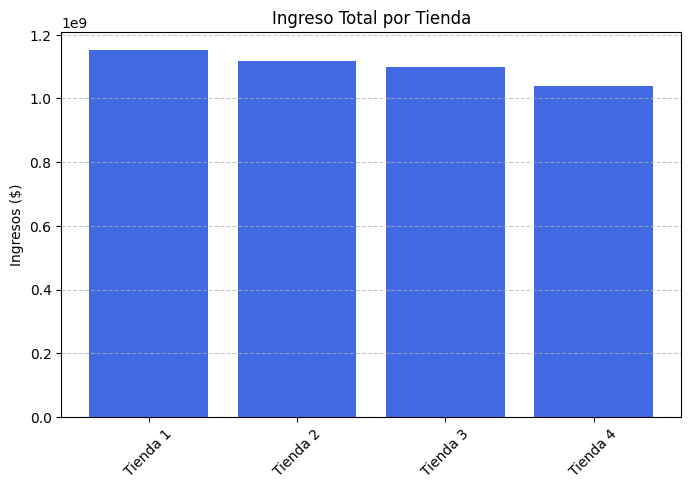

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [31]:
Tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4,
} # Agrupamos las tiendas en un diccionario

ingresos = {nombre: df["Precio"].sum() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(ingresos.keys(), ingresos.values(), color="royalblue")
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, ingreso in ingresos.items():
    print(f"{nombre}: ${ingreso:,.2f}")

# 2 Ventas por Categoría

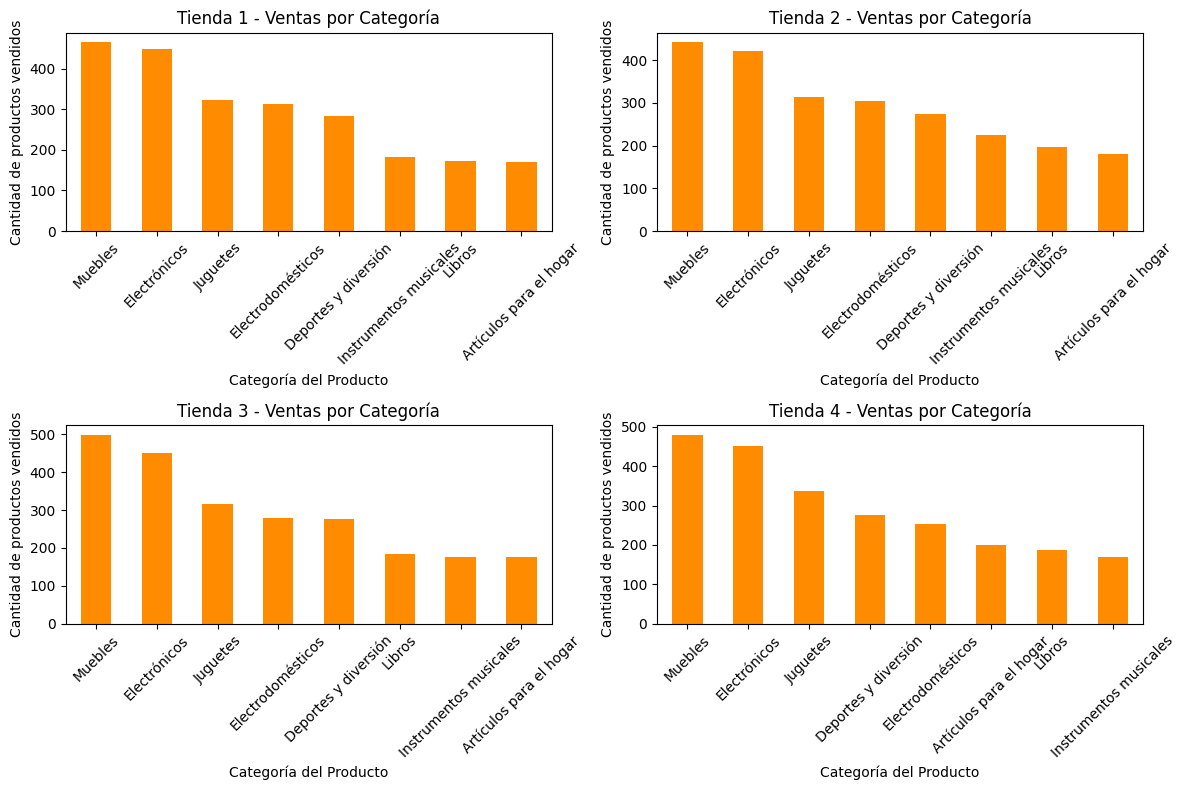

In [32]:
plt.figure(figsize=(12, 8))

for i, (nombre, df) in enumerate(Tiendas.items(), 1):
    plt.subplot(2, 2, i)
    categoria = df["Categoría del Producto"].value_counts()
    categoria.plot(kind='bar', color='darkorange')
    plt.title(f"{nombre} - Ventas por Categoría")
    plt.ylabel("Cantidad de productos vendidos")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda

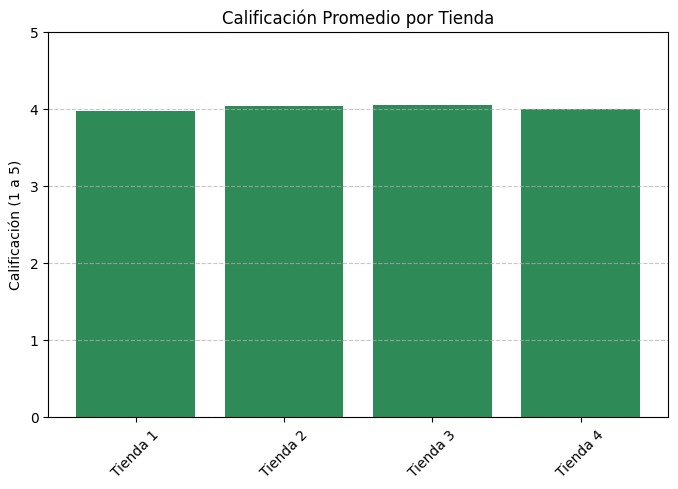

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


In [33]:
calificaciones = {nombre: df["Calificación"].mean() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(calificaciones.keys(), calificaciones.values(), color="seagreen")
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, calif in calificaciones.items():
    print(f"{nombre}: {calif:.2f}")


# 4. Productos Más y Menos Vendidos

In [34]:
for nombre, df in Tiendas.items():
    producto_counts = df["Producto"].value_counts()
    mas_vendido = producto_counts.idxmax()
    menos_vendido = producto_counts.idxmin()

    print(f"{nombre}")
    print(f"📈 Producto más vendido: {mas_vendido} ({producto_counts.max()} ventas)")
    print(f"📉 Producto menos vendido: {menos_vendido} ({producto_counts.min()} venta/s)\n")


Tienda 1
📈 Producto más vendido: Microondas (60 ventas)
📉 Producto menos vendido: Auriculares con micrófono (33 venta/s)

Tienda 2
📈 Producto más vendido: Iniciando en programación (65 ventas)
📉 Producto menos vendido: Juego de mesa (32 venta/s)

Tienda 3
📈 Producto más vendido: Kit de bancas (57 ventas)
📉 Producto menos vendido: Bloques de construcción (35 venta/s)

Tienda 4
📈 Producto más vendido: Cama box (62 ventas)
📉 Producto menos vendido: Guitarra eléctrica (33 venta/s)



# 5. Envío promedio por tienda

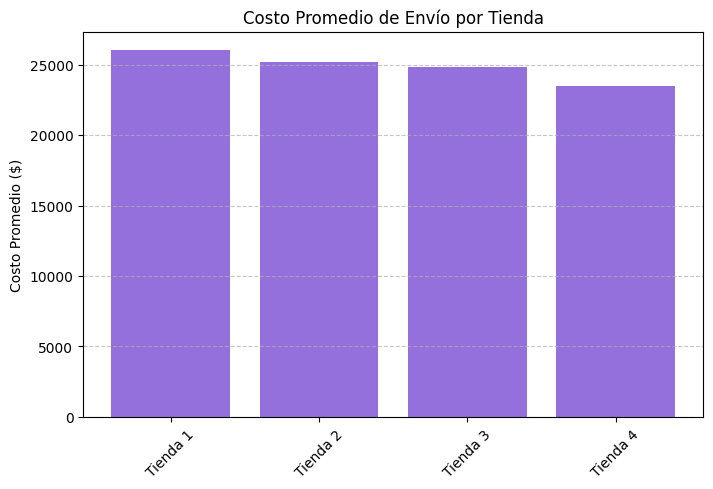

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


In [35]:
envios = {nombre: df["Costo de envío"].mean() for nombre, df in Tiendas.items()}

plt.figure(figsize=(8, 5))
plt.bar(envios.keys(), envios.values(), color="mediumpurple")
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for nombre, costo in envios.items():
    print(f"{nombre}: ${costo:.2f}")

# Recomendación de Tienda para Vender

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# comparaciíon
resumen = pd.DataFrame({
    "Ingresos": ingresos,
    "Calificación Promedio": calificaciones,
    "Costo Envío Promedio": envios
})

# ingresos y calificación: más alto = mejor, envío: más bajo = mejor
scaler = MinMaxScaler()
resumen_norm = resumen.copy()
resumen_norm["Ingresos"] = scaler.fit_transform(resumen[["Ingresos"]])
resumen_norm["Calificación Promedio"] = scaler.fit_transform(resumen[["Calificación Promedio"]])
resumen_norm["Costo Envío Promedio"] = 1 - scaler.fit_transform(resumen[["Costo Envío Promedio"]])  # inverso

# Pesos cada factor
pesos = {
    "Ingresos": 0.5,
    "Calificación Promedio": 0.3,
    "Costo Envío Promedio": 0.2
}

# Puntuación final
resumen_norm["Puntaje Final"] = (
    resumen_norm["Ingresos"] * pesos["Ingresos"] +
    resumen_norm["Calificación Promedio"] * pesos["Calificación Promedio"] +
    resumen_norm["Costo Envío Promedio"] * pesos["Costo Envío Promedio"]
)

# Ordenar por puntuación
resumen_ordenado = resumen_norm.sort_values(by="Puntaje Final", ascending=False)

# Resultados
print("✔️ Recomendación de Tienda para Vender:\n")
for i, (tienda, fila) in enumerate(resumen_ordenado.iterrows(), 1):
    print(f"{i}. {tienda} — Puntaje: {fila['Puntaje Final']:.3f}")

# Mejor tienda
mejor_tienda = resumen_ordenado.index[0]
print(f"\n✔️ Recomendación final: Vender principalmente en {mejor_tienda} por tener el mejor balance entre facturación, calificación y logística.")


✔️ Recomendación de Tienda para Vender:

1. Tienda 2 — Puntaje: 0.663
2. Tienda 3 — Puntaje: 0.660
3. Tienda 1 — Puntaje: 0.500
4. Tienda 4 — Puntaje: 0.280

✔️ Recomendación final: Vender principalmente en Tienda 2 por tener el mejor balance entre facturación, calificación y logística.
